In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches


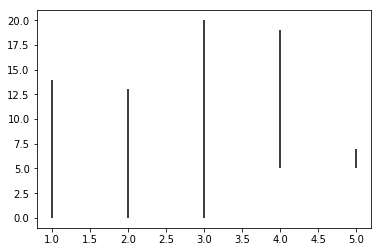

In [2]:
# plt.vlines() 竖线  plt.hlines() #棒棒糖图
X = [1,2,3,4,5]
y = [14,13,20,19,7]
plt.vlines(x=X, ymin=[0,0,0,5,5], ymax=y)
plt.show()

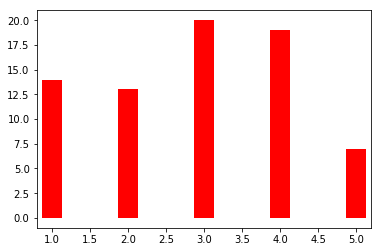

In [3]:
# 线变宽就成了柱状图
plt.vlines(x=X, ymin=0, ymax=y, linewidth=20, color='red', linestyles='solid')

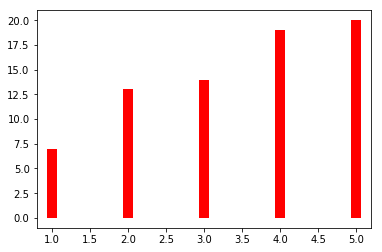

In [5]:
# 如果希望有序的话， 对y进行排序
y.sort()
plt.vlines(x=X, ymin=0, ymax=y, linewidth=10, colors='red', linestyles='solid')

In [6]:
# 导入数据demo
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [7]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
        ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用每加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能
[*zip(df.columns, name)]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

In [10]:
#提取出我们需要的数据：使用groupby聚合每个品牌的车辆，求每个品牌下的城市里程/加仑的均值
df = df[['cty', 'manufacturer']].groupby('manufacturer').mean()
df

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [13]:
df.sort_values(by=['cty'], inplace=True)

In [14]:
df

,cty
manufacturer,
lincoln,11.333333
land rover,11.500000
dodge,13.135135
mercury,13.250000
jeep,13.500000
ford,14.000000
chevrolet,15.000000
pontiac,17.000000
audi,17.611111


In [15]:
df.reset_index(inplace=True)

In [16]:
df

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000
5,ford,14.000000
6,chevrolet,15.000000
7,pontiac,17.000000
8,audi,17.611111
9,nissan,18.076923


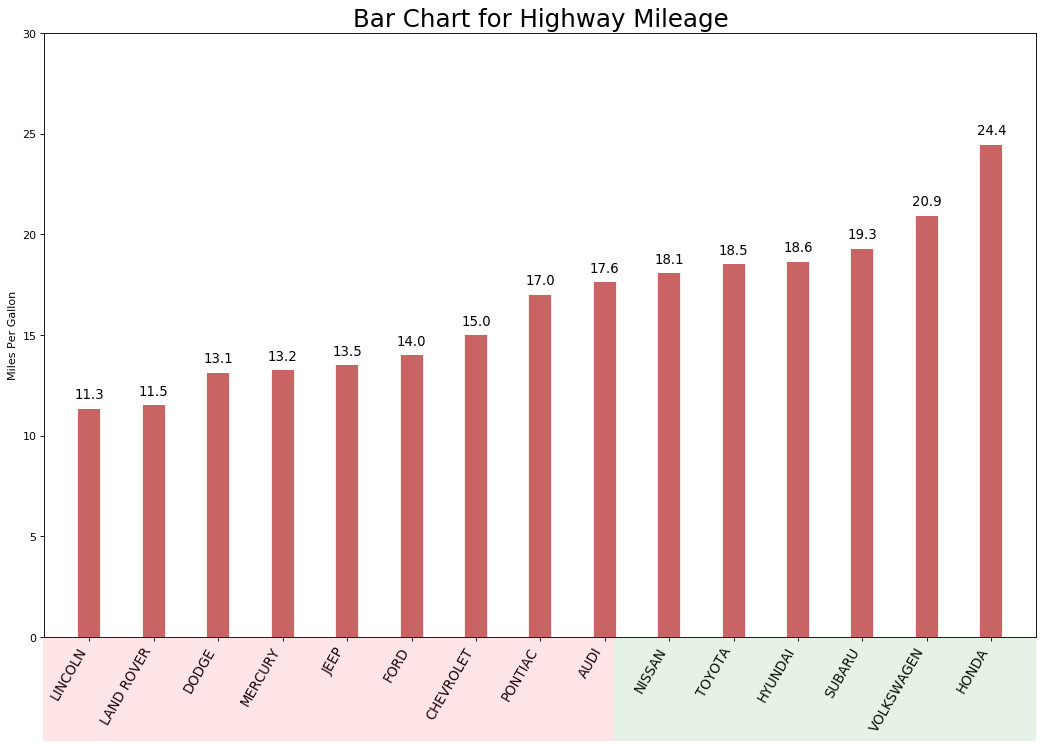

In [50]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)

ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# 添加标注
for index, cty in enumerate(df.cty):
    ax.text(index, cty+0.5, str(round(cty, 1)), ha='center', fontsize=12)

# 添加补丁 transAxes transFigure
p1 = patches.Rectangle((0.57, -0.005), width=0.33, height=0.13, alpha=0.1, fc='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)

fig.add_artist(p1)
fig.add_artist(p2)


# 添加修饰
plt.title('Bar Chart for Highway Mileage', fontdict={'size':22})
# plt.gca().set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.ylabel('Miles Per Gallon')
plt.ylim(0, 30)
plt.xticks(df.index, df.manufacturer.str.upper(), fontsize=12, rotation=60, ha='right')
plt.show()

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 16 & 17/50 棒棒糖图与包点图

In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#准备数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

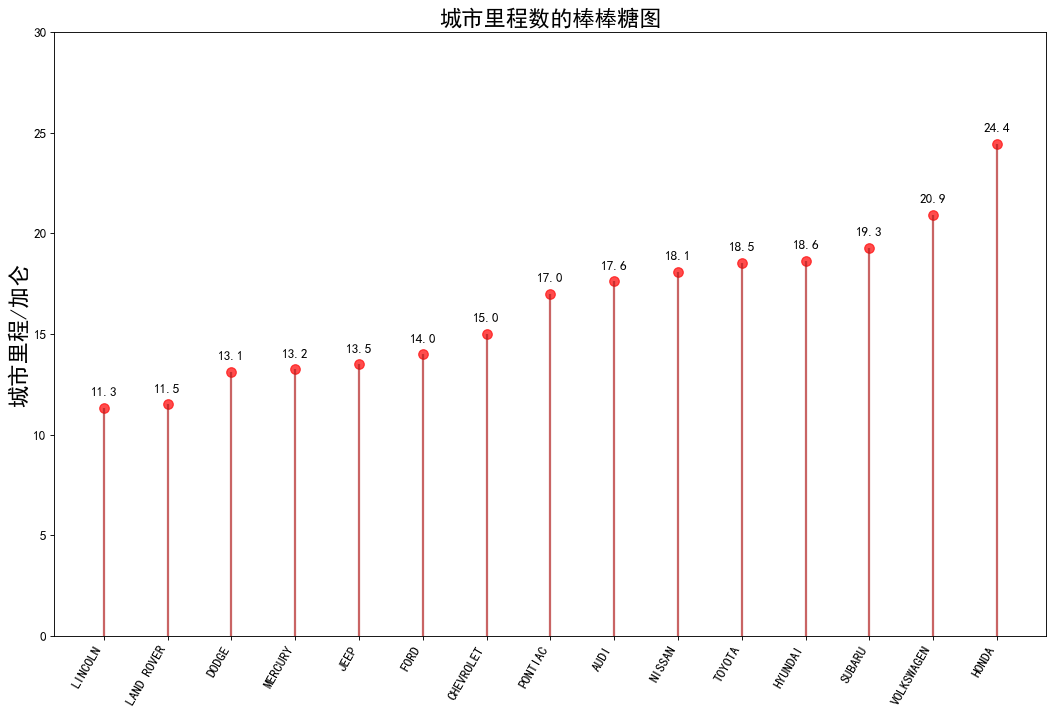

In [71]:
# 画棒棒图
plt.rcParams['font.sans-serif']=['Simhei']

fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
plt.scatter(df.index, df.cty, s=75, color='red', alpha=0.7)
for index, cty in enumerate(df.cty):
    ax.text(index, cty+0.5, str(round(cty, 1)), ha='center', va='bottom',fontsize=12)

plt.title('城市里程数的棒棒糖图', fontsize=20)
plt.ylabel('城市里程/加仑',fontsize=20)
plt.xticks(df.index, df.manufacturer.str.upper(), fontsize=12, rotation=60, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0, 30)

plt.show()

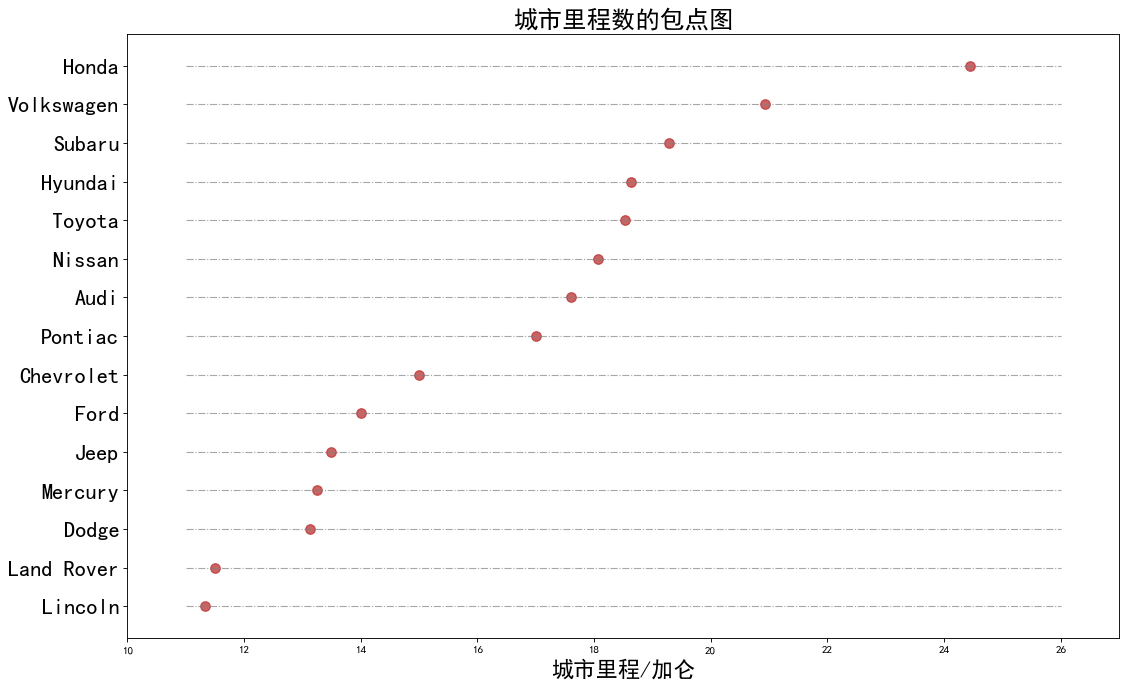

In [80]:
# 包点图
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

ax.hlines(df.index, xmin=11, xmax=26, 
          linestyle='dashdot', 
          color='gray', 
          alpha=0.7, 
          linewidth=1)
ax.scatter(x=df.cty, y=df.index, s=75, color='firebrick', alpha=0.7)

#装饰图像
ax.set_title('城市里程数的包点图', fontdict={'size':22})
ax.set_xlabel('城市里程/加仑',fontsize=20)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right',"size":20})
ax.set_xlim(10, 27) #X轴现在才是城市里程/加仑，取值范围要在城市里程的最大值和最小值之间
plt.show()